In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import h5py

In [2]:
hf = h5py.File('SVHN_single_grey1.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
x_test=hf.get('X_test')
x_test=np.array(x_test)

In [5]:
x_train=hf.get('X_train')
x_train=np.array(x_train)

In [6]:
y_test=hf.get('y_test')
y_test=np.array(y_test)

In [7]:
y_train=hf.get('y_train')
y_train=np.array(y_train)

In [8]:
x_val=hf.get('X_val')
x_val=np.array(x_val)
y_val=hf.get('Y_val')
y_val=np.array(y_val)

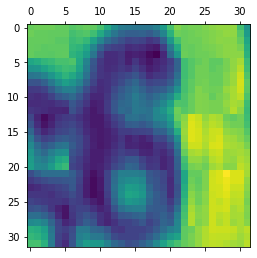

In [9]:
plt.matshow(x_train[20])

In [10]:
y_train[20]

6

In [11]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten 

In [15]:
model=Sequential()

In [16]:
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 287,410
Trainable params: 287,410
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(x_train.shape)
print(y_train.shape)

(42000, 32, 32)
(42000,)


In [20]:
model.fit(x_train,y_train,epochs=13)

Epoch 1/13
1313/1313 [==============================] - 5s 4ms/step - loss: 2.0514 - accuracy: 0.2392
Epoch 2/13
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2943 - accuracy: 0.5704
Epoch 3/13
1313/1313 [==============================] - 6s 5ms/step - loss: 1.0983 - accuracy: 0.6470
Epoch 4/13
1313/1313 [==============================] - 7s 6ms/step - loss: 1.0094 - accuracy: 0.6767
Epoch 5/13
1313/1313 [==============================] - 6s 5ms/step - loss: 0.9497 - accuracy: 0.6980
Epoch 6/13
1313/1313 [==============================] - 5s 4ms/step - loss: 0.9011 - accuracy: 0.7117
Epoch 7/13
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8692 - accuracy: 0.7230
Epoch 8/13
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8354 - accuracy: 0.7335
Epoch 9/13
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8180 - accuracy: 0.7399
Epoch 10/13
1313/1313 [==============================] - 5s 4ms/step - loss: 0.794

In [21]:
y_predict=model.predict(x_test)

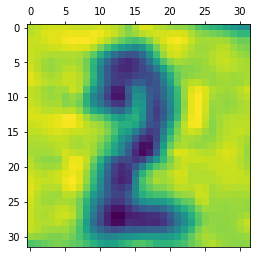

In [36]:
plt.matshow(x_test[2])

In [37]:
y_predict[2]

array([8.6494561e-05, 4.0334489e-04, 9.8425388e-01, 4.3445728e-03,
       3.5911601e-04, 4.1599333e-04, 3.3443917e-05, 3.7485273e-03,
       4.8025646e-03, 1.5520523e-03], dtype=float32)

In [38]:
np.argmax(y_predict[2])

2

In [25]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.7530 - accuracy: 0.7672


[0.7530216574668884, 0.7672222256660461]